# **Задание 1**

In [152]:
import pandas as pd

In [153]:
df = pd.read_excel("датасет.xlsx",sheet_name="База данных")
df.head(5)

,№ записи,NPS,CSI4_r1,CSI4_r2,CSI4_r3,CSI4_r4,CSI4_r5,CSI4_r6,CSI4_r7,CSI4_r8,...,CSI4_r11,CSI4_r12,CSI4_r13,CSI4_r14,CSI4_r15,CSI4_r16,CSI4_r17,CSI4_r18,CSI4_r19,Age
0,ИМЯ ПЕРЕМЕННОЙ,NPS - Насколько Вы удовлетворены оператором [Q...,CSI4_r1 - Насколько для Вас важны следующие па...,CSI4_r2 - Насколько для Вас важны следующие па...,CSI4_r3 - Насколько для Вас важны следующие па...,CSI4_r4 - Насколько для Вас важны следующие па...,CSI4_r5 - Насколько для Вас важны следующие па...,CSI4_r6 - Насколько для Вас важны следующие па...,CSI4_r7 - Насколько для Вас важны следующие па...,CSI4_r8 - Насколько для Вас важны следующие па...,...,CSI4_r11 - Насколько для Вас важны следующие п...,CSI4_r12 - Насколько для Вас важны следующие п...,CSI4_r13 - Насколько для Вас важны следующие п...,CSI4_r14 - Насколько для Вас важны следующие п...,CSI4_r15 - Насколько для Вас важны следующие п...,CSI4_r16 - Насколько для Вас важны следующие п...,CSI4_r17 - Насколько для Вас важны следующие п...,CSI4_r18 - Насколько для Вас важны следующие п...,CSI4_r19 - Насколько для Вас важны следующие п...,Age - Сколько полных лет Вам исполнилось?
1,1,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,3,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,5 – очень важно,5 – очень важно,39
2,2,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,4,4,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,45
3,3,7,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,4,...,4,4,5 – очень важно,4,4,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,35
4,4,8,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,20


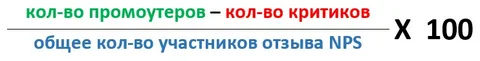

In [154]:
df_nps = df.iloc[1:, 1].astype(str)

def categorize_nps(score):
    try:
        score = int(score.split('-')[0].strip())
        if score >= 9:
            return 'Промоутеры'
        elif score >= 7:
            return 'Пассивные'
        else:
            return 'Детракторы'
    except ValueError:
        return 'Ошибка'


nps_categories = df_nps.apply(categorize_nps)

promoters = (nps_categories == 'Промоутеры').sum()
passives = (nps_categories == 'Пассивные').sum()
detractors = (nps_categories == 'Детракторы').sum()

total_responses = promoters + passives + detractors

nps_score = ((promoters - detractors) / total_responses) * 100 if total_responses > 0 else None


print(f"NPS = {nps_score}")

NPS = 57.89473684210527


# **Задание 2**

In [155]:
labels = ['18-25 лет', '26-35 лет', '36 лет и старше']
df = df[1:]
def choose_group(x):
  if x <= 25 and x >= 18:
    return labels[0]
  elif x <=35 and x >=26:
    return labels[1]
  elif x >=36:
    return labels[2]



df["Age_Group"] = df["Age"].apply(choose_group)
df

<ipython-input-155-bfb9f6a40527>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Age_Group"] = df["Age"].apply(choose_group)


,№ записи,NPS,CSI4_r1,CSI4_r2,CSI4_r3,CSI4_r4,CSI4_r5,CSI4_r6,CSI4_r7,CSI4_r8,...,CSI4_r12,CSI4_r13,CSI4_r14,CSI4_r15,CSI4_r16,CSI4_r17,CSI4_r18,CSI4_r19,Age,Age_Group
1,1,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,3,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,5 – очень важно,5 – очень важно,39,36 лет и старше
2,2,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,4,4,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,45,36 лет и старше
3,3,7,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,4,...,4,5 – очень важно,4,4,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,35,26-35 лет
4,4,8,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,4,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,20,18-25 лет
5,5,10 - полностью удовлетворен(а),4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,45,36 лет и старше
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,42,36 лет и старше
73,73,5,3,4,3,2,1 – совершенно НЕ важно,4,4,4,...,5 – очень важно,5 – очень важно,3,4,3,5 – очень важно,4,5 – очень важно,39,36 лет и старше
74,74,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,4,3,5 – очень важно,4,4,...,5 – очень важно,4,4,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,28,26-35 лет
75,75,10 - полностью удовлетворен(а),5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,...,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,5 – очень важно,43,36 лет и старше


# **Задание 3**

In [156]:
import statsmodels.api as sm

Предобрабоатаем данные,приведя их в более рабочий для модели вид , в основном я заменил категориальные данные на числовые.Также я не знаю стоило либо добавлять в этот датасет,признак Age_group из прошлого задания

In [157]:
import statsmodels.api as sm

data = pd.read_excel("датасет.xlsx",sheet_name="База данных")
clean_data = data.drop(0)
clean_data.replace({
    '5 – очень важно': 5,
    '4 – важно': 4,
    '3 – нейтрально': 3,
    '2 – не важно': 2,
    '1 – совсем не важно': 1,
    '10 - полностью удовлетворен(а)': 10,
    '9 - очень удовлетворен(а)': 9,
    '8 - удовлетворен(а)': 8,
    '7 - нейтрально': 7,
    '6 - скорее не удовлетворен(а)': 6,
    '5 - не удовлетворен(а)': 5,
    '4 - скорее не удовлетворен(а)': 4,
    '3 - не удовлетворен(а)': 3,
    '2 - очень не удовлетворен(а)': 2,
    '1 - совсем не удовлетворен(а)': 1
}, inplace=True)

clean_data = clean_data.apply(pd.to_numeric, errors='coerce')

clean_data = clean_data.dropna()

clean_data


,№ записи,NPS,CSI4_r1,CSI4_r2,CSI4_r3,CSI4_r4,CSI4_r5,CSI4_r6,CSI4_r7,CSI4_r8,...,CSI4_r11,CSI4_r12,CSI4_r13,CSI4_r14,CSI4_r15,CSI4_r16,CSI4_r17,CSI4_r18,CSI4_r19,Age
1,1,10.0,5.0,5,5.0,5.0,5.0,3.0,5,5.0,...,5,5.0,5,5.0,5,5,4,5.0,5,39
2,2,10.0,5.0,5,5.0,5.0,5.0,4.0,4,4.0,...,5,5.0,5,5.0,5,5,5,5.0,5,45
3,3,7.0,5.0,5,5.0,5.0,5.0,5.0,4,4.0,...,4,4.0,5,4.0,4,5,5,5.0,5,35
4,4,8.0,5.0,5,5.0,5.0,5.0,4.0,5,5.0,...,5,5.0,5,5.0,5,5,5,5.0,5,20
5,5,10.0,4.0,4,4.0,4.0,4.0,4.0,4,4.0,...,4,4.0,4,4.0,4,4,4,4.0,4,45
6,6,10.0,4.0,4,4.0,4.0,4.0,4.0,4,4.0,...,4,4.0,4,2.0,4,4,4,4.0,4,41
7,7,10.0,5.0,5,5.0,5.0,5.0,5.0,5,5.0,...,5,5.0,5,5.0,5,5,5,5.0,5,39
9,9,8.0,5.0,5,5.0,3.0,5.0,5.0,5,5.0,...,5,5.0,5,5.0,5,5,5,5.0,5,47
10,10,2.0,4.0,5,4.0,5.0,5.0,5.0,5,4.0,...,5,5.0,5,5.0,5,5,5,5.0,5,33
11,11,10.0,5.0,5,5.0,5.0,5.0,5.0,5,4.0,...,5,5.0,5,5.0,5,5,5,5.0,5,49


Тут просто исбавляемся от параметров не относящихся к обучению и сообственно скармливаем данные модели ,хотел сначала сделать через sklearn LinearRegression, но подумал что OLS более подробно покажет нужные нам данные.

In [158]:

y = clean_data['NPS']
X = clean_data.drop(['NPS', '№ записи'], axis=1)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

y_pred = model.predict(X)

In [161]:
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    NPS   R-squared:                       0.216
Model:                            OLS   Adj. R-squared:                 -0.186
Method:                 Least Squares   F-statistic:                    0.5373
Date:                Wed, 12 Jun 2024   Prob (F-statistic):              0.931
Time:                        14:51:06   Log-Likelihood:                -107.67
No. Observations:                  60   AIC:                             257.3
Df Residuals:                      39   BIC:                             301.3
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.9666      4.605      1.730      0.092      -1.347      17.280
CSI4_r1        1.1333      0.710      1.597      0.118      -0.302       2.569
CSI4_r2        0.6646      1.245      0.534      0.596      -1.854       3.183
CSI4_r3       -0.5956      0.770     -0.773      0.444      -2.153       0.962
CSI4_r4        0.7406      0.901      0.822      0.416      -1.081       2.563
CSI4_r5       -1.2935      1.080     -1.198      0.238      -3.478       0.891
CSI4_r6        0.2788      0.309      0.904      0.372      -0.345       0.903
CSI4_r7        0.0007      0.675      0.001      0.999      -1.364       1.366
CSI4_r8        0.6964      0.576      1.209      0.234      -0.469       1.862
CSI4_r9       -1.1474      1.065     -1.077      0.288      -3.301       1.007
CSI4_r10       0.1395      0.440      0.317      0.753      -0.750       1.029
CSI4_r11       1.2663      1.685      0.752      0.457      -2.141       4.674
CSI4_r12      -0.5190      0.890     -0.583      0.563      -2.319       1.281
CSI4_r13      -0.4792      0.884     -0.542      0.591      -2.268       1.309
CSI4_r14      -0.3110      0.584     -0.532      0.597      -1.493       0.871
CSI4_r15       0.5639      1.307      0.431      0.668      -2.079       3.207
CSI4_r16      -0.8596      0.845     -1.018      0.315      -2.568       0.849
CSI4_r17       0.1677      0.724      0.232      0.818      -1.296       1.631
CSI4_r18       0.4628      0.769      0.602      0.551      -1.092       2.018
CSI4_r19      -0.9766      2.241     -0.436      0.665      -5.509       3.555
Age            0.0306      0.033      0.921      0.363      -0.037       0.098
==============================================================================
Omnibus:                       24.779   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.239
Skew:                          -1.456   Prob(JB):                     1.83e-09
Kurtosis:                       5.760   Cond. No.                         954.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

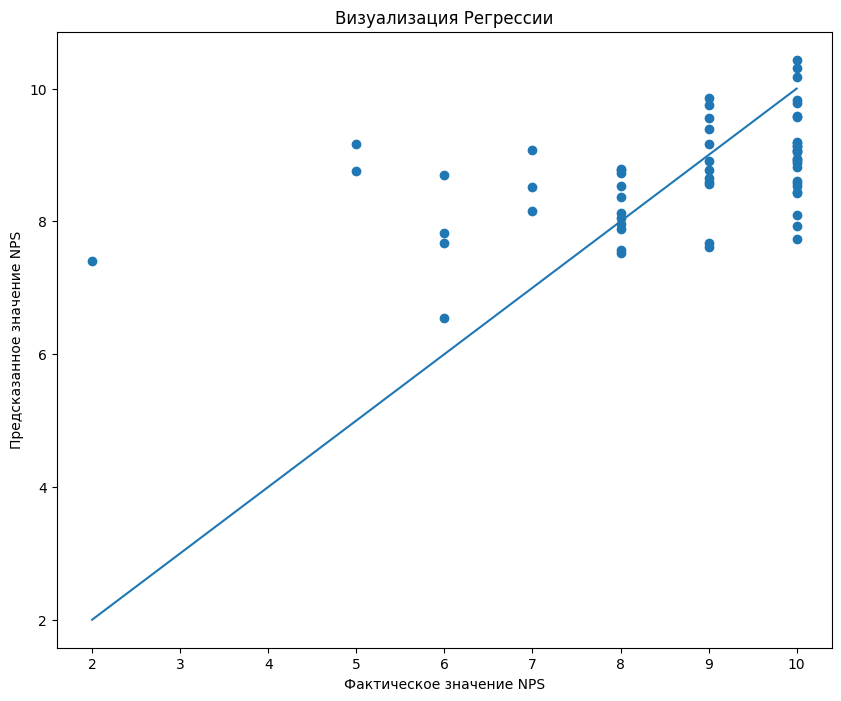

In [159]:
from matplotlib import pyplot as plt



plt.figure(figsize=(10,8))
plt.title("Визуализация Регрессии")
plt.scatter(y,y_pred)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel("Фактическое значение NPS")
plt.ylabel("Предсказанное значение NPS")
plt.show()





**Результаты анализа**
1. Построенная модель
Модель линейной регрессии:

**R-квадрат** (R²): 0.216. Это означает, что 21.6% вариации в значении NPS объясняется нашей моделью. Значение R² умеренное и указывает на то, что модель объясняет малую часть вариации.
Adjusted R-squared: -0.186, что указывает на возможную избыточную сложность модели.
2. **Важность переменных**
Наиболее значимые переменные с их коэффициентами и p-значениями:

CSI4_r1: Коэффициент = 1.1333, p-значение = 0.118 (не значимо на уровне 0.05).
CSI4_r2: Коэффициент = 0.6646, p-значение = 0.596 (не значимо).
Age: Коэффициент = 0.0306, p-значение = 0.363 (не значимо).
3. **Пояснение для клиента**
**R-квадрат**(R²) — это коэффициент детерминации, который показывает, какая доля дисперсии зависимой переменной (NPS) объясняется независимыми переменными в модели. Значение R² варьируется от 0 до 1. Если R² близко к 1, это означает, что модель хорошо объясняет вариацию зависимой переменной. Если R² близко к 0, модель плохо объясняет вариацию. В нашем случае R² равно 0.216, что указывает на умеренную объяснительную силу модели. Если проще -  он показывает, какая доля изменений в зависимой переменной (то, что мы пытаемся предсказать) объясняется независимыми переменными (факторами, которые влияют на результат).